In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv('USA_Housing.csv')

# Linear Regression Model

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [4]:
pt = PowerTransformer()
df_n = pd.DataFrame(df[['Avg. Area Income','Avg. Area House Age','Area Population'
                                         ,'Avg. Area Number of Rooms']]
                    , columns = ['Avg. Area Income','Avg. Area House Age'
                                 ,'Area Population','Avg. Area Number of Rooms'])

df_n = df_n.merge(df.Price,left_index = True,right_index = True)

In [5]:
X_train, X_test, y_train, y_test  = train_test_split(df_n.iloc[:,:-1], df_n.Price, test_size=0.3)

In [6]:
model = LinearRegression(normalize = True)

In [7]:
model.fit(X_train,y_train)

LinearRegression(normalize=True)

# LIME

In [8]:
import lime
import lime.lime_tabular

In [9]:
df_nxtr = X_train.to_numpy()
df_ny = df_n['Price'].to_numpy()
df_nxte = X_test.to_numpy()

In [10]:
explainer = lime.lime_tabular.LimeTabularExplainer(df_nxtr
                                                   , feature_names = df_n.columns[:-1], 
                                                   class_names = df_ny,
                                                   verbose = True,
                                                   mode = 'regression'
                                                  )

In [56]:
i = 6 #record num
exp = explainer.explain_instance(df_nxte[i], model.predict, num_features = 4)

Intercept 1229987.91076624
Prediction_local [1281584.96695525]
Right: 1357106.9605935877


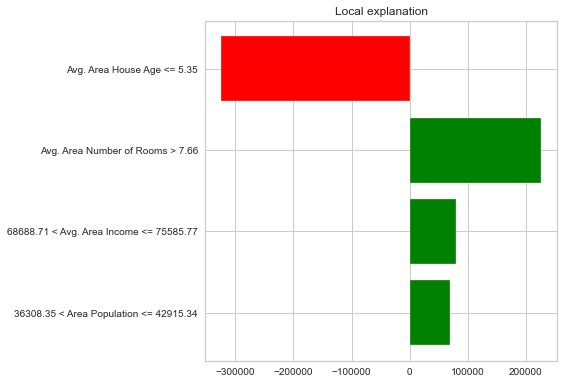

In [57]:
exp.as_pyplot_figure()
plt.tight_layout()